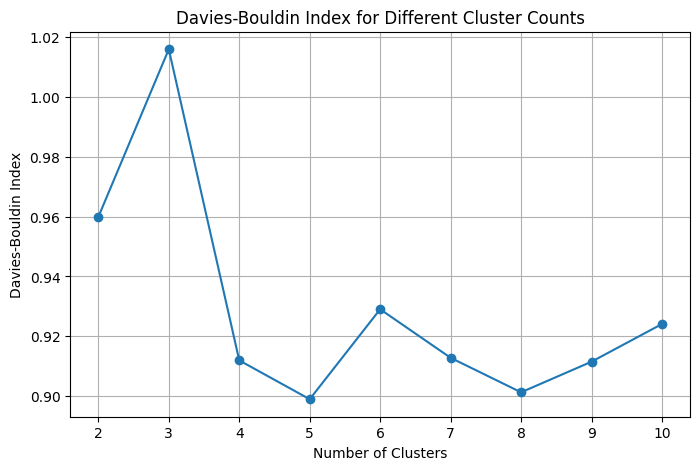

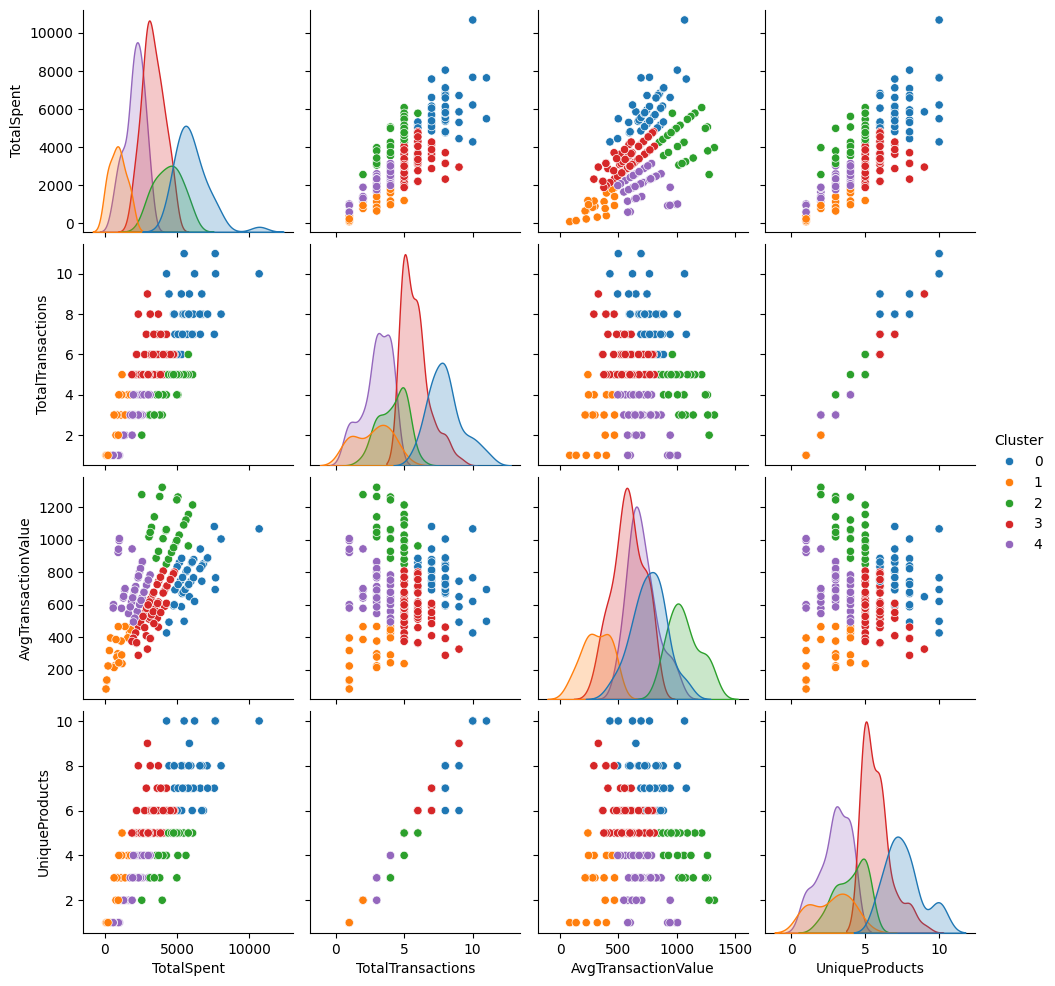

Optimal Number of Clusters: 5
Davies-Bouldin Index for Optimal Clustering: 0.8990


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transactions = pd.read_csv('/content/Transactions.csv')
customers = pd.read_csv('/content/Customers.csv')

# Merge datasets for clustering
merged_data = transactions.merge(customers, on='CustomerID')

# Feature Engineering: Aggregate transaction data per customer
customer_features = merged_data.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TotalTransactions=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean'),
    UniqueProducts=('ProductID', 'nunique')
).reset_index()

# Normalize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Determine the optimal number of clusters using the Davies-Bouldin Index
db_scores = []
clusters_range = range(2, 11)
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, cluster_labels)
    db_scores.append(db_index)

# Visualize DB Index
plt.figure(figsize=(8, 5))
plt.plot(clusters_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid()
plt.show()

# Choose optimal clusters (lowest DB index) and fit the final model
optimal_clusters = clusters_range[db_scores.index(min(db_scores))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters (Pair Plot)
sns.pairplot(customer_features, hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()

# Output the clustering results and DB index
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index for Optimal Clustering: {min(db_scores):.4f}")

# Save the clustering results
customer_features.to_csv('Customer_Clusters.csv', index=False)
